<a href="https://colab.research.google.com/github/ssktora/baseball-game/blob/main/%E3%83%97%E3%83%AD%E9%87%8E%E7%90%83%E3%83%84%E3%82%A4%E3%83%BC%E3%83%88%E3%81%AE%E6%84%9F%E6%83%85%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers[ja]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.4 MB/s 
     |████████████████████████████████| 6.6 MB 38.0 MB/s 
     |████████████████████████████████| 101 kB 7.8 MB/s 
     |████████████████████████████████| 596 kB 72.7 MB/s 
     |████████████████████████████████| 13.4 MB 48.7 MB/s 
     |████████████████████████████████| 568 kB 33.9 MB/s 
     |████████████████████████████████| 47.4 MB 87 kB/s 
  Created wheel for ipadic: filename=ipadic-1.0.0-py3-none-any.whl size=13556723 sha256=b52788f569aa4c7e0a42ec582d7fbfa5a5a51d2e2b92a6d6b91d93441434c628
  Stored in directory: /root/.cache/pip/wheels/33/8b/99/cf0d27191876637cd3639a560f93aa982d7855ce826c94348b
  Created wheel for unidic: filename=unidic-1.1.0-py3-none-any.whl size=7426 sha256=d6e6751b1a04e7b0c23d60232152a8bea4066d75857ddd309a7aac48a865d5dd
  Stored in directory: /root/.cache/pip/wheels/ce/4d/f1/170bb74b559ca338113c0315c9805e16

In [ ]:
import tweepy

# 認証に必要なキーとトークン
API_KEY = '**************'
API_SECRET = '*************'
ACCESS_TOKEN = '***************'
ACCESS_TOKEN_SECRET = '************'

# APIの認証
auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# キーワードからツイートを取得
api = tweepy.API(auth)

tweets = tweepy.Cursor(api.search,q="湯浅 #阪神タイガース-filter:retweets",lang='ja', since="2022-07-23_18:00:00_JST", until="2022-07-23_21:00:00_JST").items()


import re
tweet_list = []

for tweet in tweets:
   
    string = tweet.text
    text = re.sub("https?://[\w!\?/\+\-_~=;\.,\*&@#\$%\(\)'\[\]]+", "", string)
   
    characters = ["\n"]
    for m in re.finditer(r"#\w+", text):
      characters.append(m[0])
    for m in re.finditer(r"＃\w+", text):
      characters.append(m[0])
    for character in characters:
      text = text.replace(character,"")

    tweet_list.append(text)
print(len(tweet_list))
from transformers import pipeline, AutoModelForSequenceClassification, BertJapaneseTokenizer
 
# 感情分析の実行
model = AutoModelForSequenceClassification.from_pretrained('daigo/bert-base-japanese-sentiment') 
tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')
nlp = pipeline("sentiment-analysis",model=model,tokenizer=tokenizer)

dic_list = []
for i in range(len(tweet_list)):
  print(nlp(tweet_list[i]))
  a = nlp(tweet_list[i])
  dic_list.append(a)
  print(tweet_list[i])

  

100
[{'label': 'ポジティブ', 'score': 0.9418719410896301}]
お疲れ湯浅〜〜(^o^ゞ任せた岩崎〜〜L(‘▽‘)／
[{'label': 'ポジティブ', 'score': 0.9345822930335999}]
今日、久々に中継を観れてるんですが、湯浅のストレートがどんどん良くなってるように思います。今すぐにとは言いませんが、セットアッパー岩崎、クローザー湯浅の形も試してほしい🥺
[{'label': 'ポジティブ', 'score': 0.7665319442749023}]
【今日の反省会、８回】（表）リリーフ湯浅代打、楠本、空振り三振❗蝦名、桑原、空振り三振❗湯浅ちゃんたら、色っぽいんだからー❗お、と、こ、ま、え❗（裏）リリーフ平田佐藤輝、ファーストライナー❗大山、… 
[{'label': 'ポジティブ', 'score': 0.9506975412368774}]
今日はフレッシュオールスターゲームの中継を見てましたが、一軍では阪神 湯浅京己投手(BCリーグ富山出身)が3者連続三振！見事なピッチングです。
[{'label': 'ポジティブ', 'score': 0.9239776134490967}]
今日のタイガース戦もラジオで聞いてます。湯浅投手　見たかったなぁ～😁福本さんの解説は楽しいですね～👍️
[{'label': 'ポジティブ', 'score': 0.9672331213951111}]
湯浅くん最高やなさんさんしんか
[{'label': 'ポジティブ', 'score': 0.9470996856689453}]
湯浅ナイスピッチング👏
[{'label': 'ポジティブ', 'score': 0.8601320385932922}]
８回、湯浅が３三振。完璧なリリーフやんか。
[{'label': 'ネガティブ', 'score': 0.8337472081184387}]
湯浅最後うまかった意図的にクイックで速球投げてタイミング外した桑原が段々合ってきて嫌な感じになっていたからな     
[{'label': 'ポジティブ', 'score': 0.8086192607879639}]
三者連続三振〜〜!ナイスピッチ湯浅〜〜!!L(‘▽‘)／L(‘▽‘)／
[{'label': '

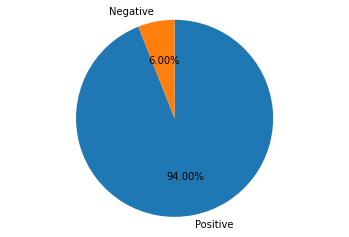

In [ ]:
pn_list = []

for i in range(len(dic_list)):
  t = dic_list[i]
  if t[0]["label"] == "ポジティブ":
    pn_list.append(1)
  else:
    pn_list.append(0)


%matplotlib inline
import matplotlib.pyplot as plt

p = pn_list.count(1) / len(pn_list)
n = pn_list.count(0) / len(pn_list)
value=[p, n]
labels=["Positive", "Negative"]
plt.pie(x=value, labels=labels, autopct="%.2f%%", startangle=90, counterclock=False)
plt.axis("equal")
plt.show()